# RETAIL DATASET





__In this project I will be working on the Reatil dataset in which we will try to find out the distribution of sales according to 
different different variables.  Here we will also try to analyze that what are the factors that are affecting our sales or will
find out some which may be beneficial for the sales. 
After analysing all this we will come up with a solution also on how to promote our sales keeping in mind all the factors we have analyzed__.

__1).Checking the structure of dataset and looking for missing values.__


First of all we have to look at the structure of our dataset that what is it actually and how do we deal with it.
Then we will look for the missing values if present followed by the errenous values.


__2).Checking the presence of outliers and errenous values__.


We will then check different variables for the presence of outliers.

__3).Data cleaning__


After checking them all we will clean the dataset and onc cleaned we are good to go for further analysis.

__4). Univariate analysis__

As the name suggests in this step we have to look for the distribution of each variable.
This step is crucial to see whether the variables are normally distributed or not. If not then we will go for transformation of the data because in order to deploy our ML model for prediction, it is important to ensure the normalization of features. 
<u>reason :</u> **Machine learning algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize the data before training machine learning models on it. Normalization also makes the training process less sensitive to the scale of the features.**

__5). Bivariate analysis__

After analyzing distribution of each variable now we will look at the relation between different variables.
Also will observe the correlation between different numerical variables and their effect on our target variable.



# Structure of dataset

In [1]:
#Importing necessary libraries

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

__Loading the dataset__

In [2]:
retail = pd.read_excel("all_data_copy.xlsx")
retail.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"


In [3]:
#checking for the number of rows and columns

retail.shape


(373700, 6)

# Basic summary of the dataset


__We will now take a closer look at the different varibles we have, their datatypes and their significance in the dataset.__



|  Varibles        | Their type and significance|
|  :-----|:-----|
|  1.**Order ID** | Categorical Ordinal, Order identification number for each product|
|  2.**Product**  | Categorical Nominal, name of the product|
|  3.**Quantity Ordered**| Numerical Discrete, Amount of items|
|  4.**Price Each**| Numerical continuous, Price of each product per item in dollars|
|  5.**Order Date** | DateTime type, Date of purchase of the product along with time|
|  6.**Purchase Address**| Categorical Nominal, Address of purchase order|
|  :-----|:-----|
|  **Number of rows**|  373700|
|  **Number of columns**| 6|




In [4]:
#Dropping unnecessary columns like Order ID

retail.drop(columns= 'Order ID', inplace = True)

In [5]:
retail.tail()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
373699,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [6]:
retail.describe(include = 'all')

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,372610,372610,372610.00,372610,372610
unique,20,10,18.00,142396,140788
top,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,43806,337104,43806.00,710,710


__As we can see here describe function is not giving us information about the measures of central tendency or dispersion which
clearly signifies that my system is considering all the features as categorical which is not correct so we will try to change 
the datatype of few columns like Quantity and price__.

In [7]:
#info to check the datatypes
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           372610 non-null  object
 1   Quantity Ordered  372610 non-null  object
 2   Price Each        372610 non-null  object
 3   Order Date        372610 non-null  object
 4   Purchase Address  372610 non-null  object
dtypes: object(5)
memory usage: 14.3+ MB


__As we can see above every feature has same number  of missing values so we can directly remove the rows which are having 
empty values__.

In [8]:
retail.isna().sum()

Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [9]:
retail.isna().any()

Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [10]:
retail['Quantity Ordered'] = retail['Quantity Ordered'].astype('str')

In [11]:
new_retail = retail.dropna()
new_retail

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [12]:
new_retail.shape

(372610, 5)

In [13]:
new_retail.isna().any()

Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [14]:
a = new_retail['Product'].unique()
pd.DataFrame(a)

,0
0,iPhone
1,Lightning Charging Cable
2,Wired Headphones
3,27in FHD Monitor
4,AAA Batteries (4-pack)
5,27in 4K Gaming Monitor
6,USB-C Charging Cable
7,Bose SoundSport Headphones
8,Apple Airpods Headphones
9,Macbook Pro Laptop


In [15]:
b = new_retail['Purchase Address'].unique()
pd.DataFrame(b)

,0
0,"944 Walnut St, Boston, MA 02215"
1,"185 Maple St, Portland, OR 97035"
2,"538 Adams St, San Francisco, CA 94016"
3,"738 10th St, Los Angeles, CA 90001"
4,"387 10th St, Austin, TX 73301"
...,...
140783,"767 2nd St, San Francisco, CA 94016"
140784,"14 Madison St, San Francisco, CA 94016"
140785,"273 Wilson St, Seattle, WA 98101"
140786,"778 River St, Dallas, TX 75001"


__Also there is no erroneous values here as we can see.__

In [16]:
#checking for null values or unnecessary values in quantity
new_retail['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [17]:
#checking for null values in Price
new_retail['Price Each'].unique()

array([700, 14.95, 11.99, 149.99, 2.99, 389.99, 11.95, 99.99, 150, 1700,
       300, 400, 3.84, 600, 109.99, 379.99, 999.99, 'Price Each'],
      dtype=object)

In [18]:
#Getting those rows which are having column name as observation
t = new_retail[(new_retail['Product'] == 'Product')]

In [19]:
t

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...
372014,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
372401,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373413,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [20]:
#Dropped those rows which are having irrelevant information like name of columns only

clean_retail =  new_retail.drop(new_retail[new_retail["Product"] == 'Product'].index)
clean_retail

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [21]:
clean_retail

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [22]:
372610 - 371900

710

__So earlier we had 372610 rows (After removing null values) and as we dig deep found that there are some rows which are of
no use to us (around 710) rows so we have successfully removed them as well.__

In [23]:
clean_retail['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [24]:
clean_retail

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


__Checking for duplicate rows if present like if there is any repetition of relevent entry so that we can remove it.__

In [25]:
clean_retail.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
373695     True
373696     True
373697     True
373698     True
373699     True
Length: 371900, dtype: bool

In [26]:
clean_retail.duplicated().sum()

186214

In [27]:
clean_retail.drop_duplicates(inplace=True)




__No in the Order Date column we can separate it into year month data and time features so that we can closely look at
the scenerio of sales during a particular month,  year,  day or time.__

__Before that we must look at the datatype of this order date feature because in order to separate different time stamps
this feature must be present in date time format__.

In [28]:
clean_retail['Order Date'].dtype

dtype('O')

__so as we can see it is Object type......so we need to convert it into date time.__

In [29]:
clean_retail['Order Date']= pd.to_datetime(clean_retail['Order Date'])

In [30]:
clean_retail.info()  #Order Date converted into date time datatype.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185686 non-null  object        
 1   Quantity Ordered  185686 non-null  object        
 2   Price Each        185686 non-null  object        
 3   Order Date        185686 non-null  datetime64[ns]
 4   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 8.5+ MB


In [31]:
#Extracting Year from the order date if any

clean_retail['Year'] = clean_retail['Order Date'].dt.year

#Extracting month

clean_retail['Month'] = clean_retail['Order Date'].dt.month

#Extracting day from the Order date

clean_retail['day'] = clean_retail['Order Date'].dt.day

#Extracting Time

clean_retail['Hour'] = clean_retail['Order Date'].dt.hour

In [32]:
clean_retail.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,day,Hour
0,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11


In [33]:
clean_retail['Year'].unique()        #So we have 2 years data only so we cannot drop this column

array([2019, 2020], dtype=int64)

# Summarizing Cleaned Dataset

In [34]:
clean_retail.describe(include = 'all')

<ipython-input-34-47f8feba425e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_retail.describe(include = 'all')


,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,day,Hour
count,185686,185686,185686.00,185686,185686,185686.000000,185686.000000,185686.000000,185686.000000
unique,19,9,17.00,142395,140787,NaN,NaN,NaN,NaN
top,USB-C Charging Cable,1,11.95,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016",NaN,NaN,NaN,NaN
freq,21859,168291,21859.00,8,9,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2019-01-01 03:07:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-01-01 05:13:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2019.000183,7.058653,15.758662,14.412934
std,NaN,NaN,NaN,NaN,NaN,0.013530,3.502932,8.782064,5.423329
min,NaN,NaN,NaN,NaN,NaN,2019.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,2019.000000,4.000000,8.000000,11.000000


In [35]:
clean_retail = clean_retail.rename(columns={'Quantity Ordered': 'Quantity', 'Price Each': 'Price', 'Purchase Address': 'Address'})

In [36]:
clean_retail.head()

,Product,Quantity,Price,Order Date,Address,Year,Month,day,Hour
0,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11


In [37]:
clean_retail['Price']= pd.to_numeric(clean_retail['Price'])
clean_retail['Quantity']= pd.to_numeric(clean_retail['Quantity'])

In [38]:
clean_retail.describe(include = 'all')

<ipython-input-38-47f8feba425e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_retail.describe(include = 'all')


,Product,Quantity,Price,Order Date,Address,Year,Month,day,Hour
count,185686,185686.000000,185686.000000,185686,185686,185686.000000,185686.000000,185686.000000,185686.000000
unique,19,NaN,NaN,142395,140787,NaN,NaN,NaN,NaN
top,USB-C Charging Cable,NaN,NaN,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016",NaN,NaN,NaN,NaN
freq,21859,NaN,NaN,8,9,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2019-01-01 03:07:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-01-01 05:13:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.124544,184.519255,NaN,NaN,2019.000183,7.058653,15.758662,14.412934
std,NaN,0.443069,332.843838,NaN,NaN,0.013530,3.502932,8.782064,5.423329
min,NaN,1.000000,2.990000,NaN,NaN,2019.000000,1.000000,1.000000,0.000000
25%,NaN,1.000000,11.950000,NaN,NaN,2019.000000,4.000000,8.000000,11.000000


In [39]:
clean_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Product     185686 non-null  object        
 1   Quantity    185686 non-null  int64         
 2   Price       185686 non-null  float64       
 3   Order Date  185686 non-null  datetime64[ns]
 4   Address     185686 non-null  object        
 5   Year        185686 non-null  int64         
 6   Month       185686 non-null  int64         
 7   day         185686 non-null  int64         
 8   Hour        185686 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 14.2+ MB


In [40]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           372610 non-null  object
 1   Quantity Ordered  373700 non-null  object
 2   Price Each        372610 non-null  object
 3   Order Date        372610 non-null  object
 4   Purchase Address  372610 non-null  object
dtypes: object(5)
memory usage: 14.3+ MB


__We can clearly differentiate the difference in the datatypes of the clean dataset and the raw dataset.
Also the difference between the rows before and after removing the missing values, duplicates etc.
Third, we have created some new columns also which can be useful to us in future.
We are now done with Data cleaning and pre- processing.__

# Distribution of Sales

__We are provided with the quantity and price only so we need to calculate the sales by creating another column and using the formulae as per the availability of features.__


__So we will use the formula as,  sales =  price * Quantity__

In [41]:
clean_retail['Sales'] = clean_retail['Price']*clean_retail['Quantity']

In [42]:
clean_retail

,Product,Quantity,Price,Order Date,Address,Year,Month,day,Hour,Sales
0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,700.00
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14,14.95
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,23.98
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,149.99
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11,11.99
...,...,...,...,...,...,...,...,...,...,...
186845,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019,12,11,20,14.95
186846,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019,12,1,12,7.68
186847,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019,12,9,6,400.00
186848,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019,12,3,10,11.99


# We are now ready to go with distribution of sales

__Distribution Month wise__



C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


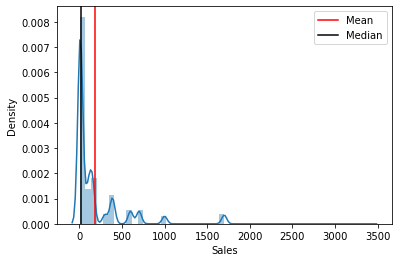

In [43]:
sns.distplot(clean_retail.Sales)
plt.axvline(x = clean_retail.Sales.mean(), color = 'red', alpha = 1, label = "Mean")
plt.axvline(x = clean_retail.Sales.median(), color = 'black', alpha = 1, label = "Median")
plt.legend()

As we can see the sales distribution is Positively skewed (Right skewed). Let's measure the extent of skewness now.

In [44]:
clean_retail['Sales'].skew()

2.880375571745305

__This Feature is highly skewed so we need to transform it into a normal form.__


__So now we will apply different transformation methods and then will go with the best suited one__

In [45]:
import numpy as np

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

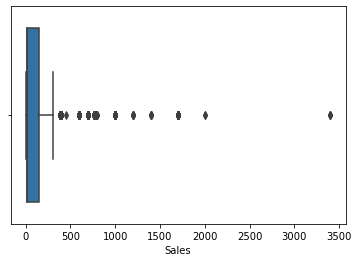

In [46]:
sns.boxplot(clean_retail.Sales)

In [47]:
clean_retail['Sales'].skew()

2.880375571745305

In [48]:
retail_transform = clean_retail['Sales'].transform([np.sqrt, np.log])
retail_transform

,sqrt,log
0,26.457513,6.551080
1,3.866523,2.704711
2,4.896938,3.177220
3,12.247040,5.010569
4,3.462658,2.484073
...,...,...
186845,3.866523,2.704711
186846,2.771281,2.038620
186847,20.000000,5.991465
186848,3.462658,2.484073


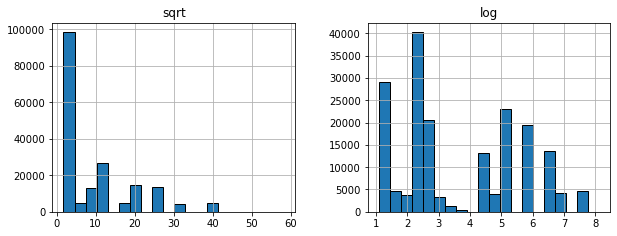

In [49]:
retail_transform.hist(bins = 20, layout = (2,2), edgecolor = 'k', figsize = (10,8))
plt.show()

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


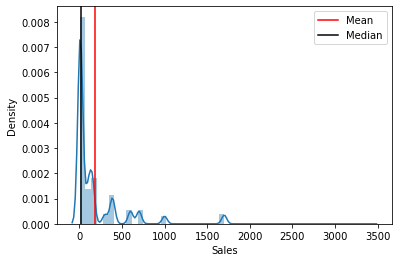

In [50]:
clean_retail['Sales_log'] = np.log(clean_retail['Sales'])
sns.distplot(clean_retail.Sales)
plt.axvline(x = clean_retail.Sales.mean(), color = 'red', alpha = 1, label = "Mean")
plt.axvline(x = clean_retail.Sales.median(), color = 'black', alpha = 1, label = "Median")
plt.legend()



In [51]:
clean_retail['Sales_log'].skew()

0.3104760455552074

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


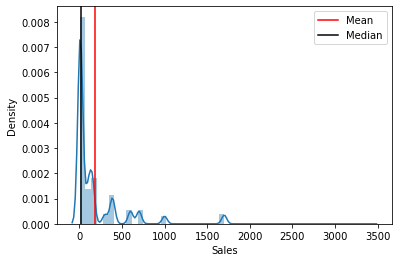

In [52]:
clean_retail['Sales_sqrt'] = np.sqrt(clean_retail['Sales'])
sns.distplot(clean_retail.Sales)
plt.axvline(x = clean_retail.Sales.mean(), color = 'red', alpha = 1, label = "Mean")
plt.axvline(x = clean_retail.Sales.median(), color = 'black', alpha = 1, label = "Median")
plt.legend()


In [53]:
clean_retail['Sales_sqrt'].skew()

1.4434663802723438

Log transformation worked better so we will go with it.

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_log'>

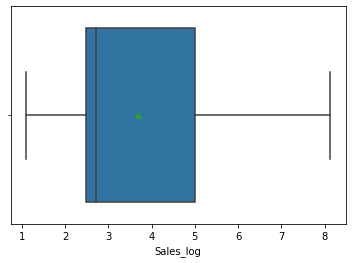

In [54]:
sns.boxplot(clean_retail.Sales_log, showmeans = True)

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_sqrt'>

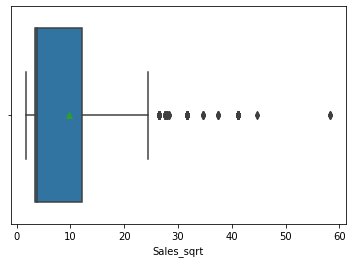

In [55]:
sns.boxplot(clean_retail.Sales_sqrt, showmeans = True)

<AxesSubplot:xlabel='Month', ylabel='Sales'>

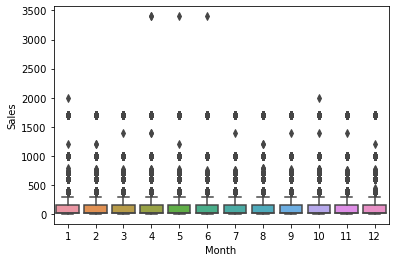

In [56]:
sns.boxplot(x = 'Month', y = 'Sales', data = clean_retail)

Square root transformed

<AxesSubplot:xlabel='Month', ylabel='Sales_sqrt'>

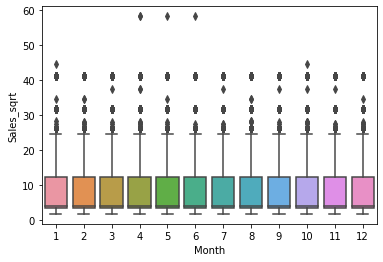

In [57]:
sns.boxplot(x = 'Month', y = 'Sales_sqrt', data = clean_retail)

# Distribution of sales Month wise

Log transformed

<AxesSubplot:xlabel='Month', ylabel='Sales_log'>

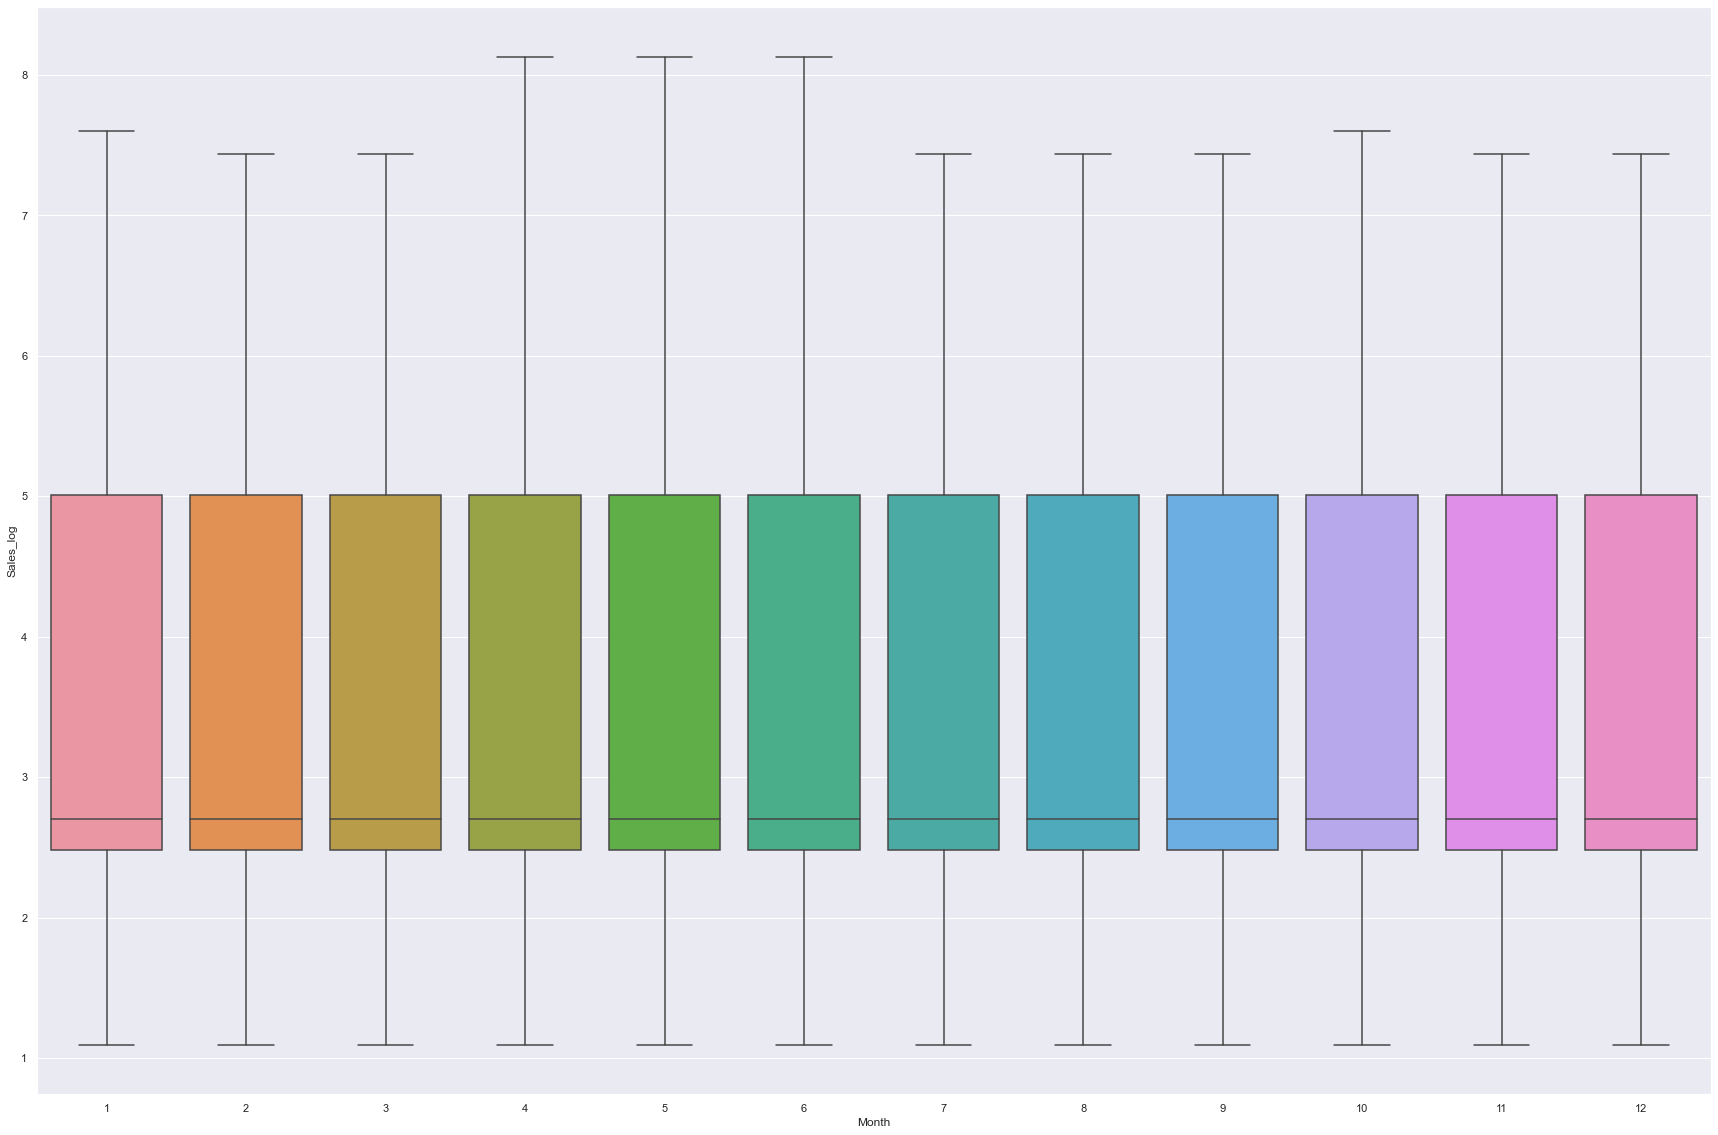

In [251]:
sns.boxplot(x = 'Month', y = 'Sales_log', data = clean_retail)

In [252]:
monthwisesale = clean_retail.groupby('Month')['Sales_log'].sum()
monthwisesale.sort_values(ascending = False)

Month
12    91899.143921
10    74349.703195
4     67393.196697
11    64365.978305
5     61155.735203
3     56017.900826
7     52849.180532
6     50429.766465
8     44258.240149
2     44190.667441
9     42515.915781
1     35987.162920
Name: Sales_log, dtype: float64

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_log'>

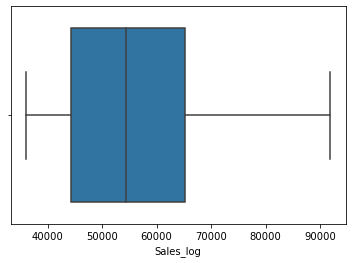

In [61]:
sns.boxplot(monthwisesale)

In [62]:
productwisesale = clean_retail.groupby('Product')['Quantity','Sales'].sum()

pd.DataFrame(productwisesale).sort_values(by = 'Sales', ascending = False)


<ipython-input-62-0b1aaabeb979>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  productwisesale = clean_retail.groupby('Product')['Quantity','Sales'].sum()


,Quantity,Sales
Product,,
Macbook Pro Laptop,4725,8032500.00
iPhone,6847,4792900.00
ThinkPad Laptop,4128,4127958.72
Google Phone,5529,3317400.00
27in 4K Gaming Monitor,6239,2433147.61
34in Ultrawide Monitor,6192,2352898.08
Apple Airpods Headphones,15637,2345550.00
Flatscreen TV,4813,1443900.00
Bose SoundSport Headphones,13430,1342865.70


__Macbook Pro Laptop is hsowing highest sales but it basically due to its High prices. So we should also look for its quantity distribution as well.__

In [63]:
productwisesale = clean_retail.groupby('Product')['Quantity','Sales'].sum()

pd.DataFrame(productwisesale).sort_values(by = 'Quantity', ascending = False)


<ipython-input-63-4d8fd4e5943e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  productwisesale = clean_retail.groupby('Product')['Quantity','Sales'].sum()


,Quantity,Sales
Product,,
AAA Batteries (4-pack),30986,92648.14
AA Batteries (4-pack),27615,106041.60
USB-C Charging Cable,23931,285975.45
Lightning Charging Cable,23169,346376.55
Wired Headphones,20524,246082.76
Apple Airpods Headphones,15637,2345550.00
Bose SoundSport Headphones,13430,1342865.70
27in FHD Monitor,7541,1131074.59
iPhone,6847,4792900.00


__In terms of quantity AAA Batteries (4-pack) is having highest sale so We should Go with the Middle ones 
like the products showing good sales price  as well as quantity.__
__In that case we will find that Headphones here are taking the lead performing fairly in terms of both Quantity and sales.__

In [64]:
clean_retail.head()

,Product,Quantity,Price,Order Date,Address,Year,Month,day,Hour,Sales,Sales_log,Sales_sqrt
0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,700.00,6.551080,26.457513
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14,14.95,2.704711,3.866523
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,23.98,3.177220,4.896938
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,149.99,5.010569,12.247040
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11,11.99,2.484073,3.462658


In [65]:
clean_retail['Address'].str.split(', ', n= 1)

0                [944 Walnut St, Boston, MA 02215]
1               [185 Maple St, Portland, OR 97035]
2          [538 Adams St, San Francisco, CA 94016]
3             [738 10th St, Los Angeles, CA 90001]
4                  [387 10th St, Austin, TX 73301]
                            ...                   
186845    [14 Madison St, San Francisco, CA 94016]
186846      [549 Willow St, Los Angeles, CA 90001]
186847          [273 Wilson St, Seattle, WA 98101]
186848            [778 River St, Dallas, TX 75001]
186849    [747 Chestnut St, Los Angeles, CA 90001]
Name: Address, Length: 185686, dtype: object

In [66]:
split_address = clean_retail['Address'].str.split(',', expand = True)
split_address

,0,1,2
0,944 Walnut St,Boston,MA 02215
1,185 Maple St,Portland,OR 97035
2,538 Adams St,San Francisco,CA 94016
3,738 10th St,Los Angeles,CA 90001
4,387 10th St,Austin,TX 73301
...,...,...,...
186845,14 Madison St,San Francisco,CA 94016
186846,549 Willow St,Los Angeles,CA 90001
186847,273 Wilson St,Seattle,WA 98101
186848,778 River St,Dallas,TX 75001


In [67]:
split_address.rename(columns = {1: 'City'}, inplace = True)

In [68]:
city = split_address['City']
pd.DataFrame(city)

,City
0,Boston
1,Portland
2,San Francisco
3,Los Angeles
4,Austin
...,...
186845,San Francisco
186846,Los Angeles
186847,Seattle
186848,Dallas


In [69]:
clean_retail = clean_retail.join(city)

In [70]:
clean_retail.head()

,Product,Quantity,Price,Order Date,Address,Year,Month,day,Hour,Sales,Sales_log,Sales_sqrt,City
0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,700.00,6.551080,26.457513,Boston
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14,14.95,2.704711,3.866523,Portland
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,23.98,3.177220,4.896938,San Francisco
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,149.99,5.010569,12.247040,Los Angeles
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11,11.99,2.484073,3.462658,Austin


In [196]:
sales = clean_retail.groupby('Month')['Sales'].sum()
pd.DataFrame(sales).sort_values(by = 'Sales', ascending = False)

,Sales
Month,
12,4.608296e+06
10,3.734778e+06
4,3.389218e+06
11,3.197875e+06
5,3.150616e+06
3,2.804973e+06
7,2.646461e+06
6,2.576280e+06
8,2.241083e+06


In [71]:
salesdist = clean_retail.groupby(['Month', 'City'])['Sales'].sum()
pd.DataFrame(salesdist).sort_values(by = 'Sales', ascending = False) 

,,Sales
Month,City,
12,San Francisco,1105582.13
10,San Francisco,865800.33
4,San Francisco,812387.30
5,San Francisco,774967.54
11,San Francisco,764502.40
...,...,...
8,Austin,125563.62
1,Portland,114985.56
2,Austin,108358.52


__Highest sales were recorded in San Francisco in the 12th month that is December__.

__San Francisco is showing highest sales overall__.

# Distribution of Sales City wise

<AxesSubplot:xlabel='City', ylabel='Sales_log'>

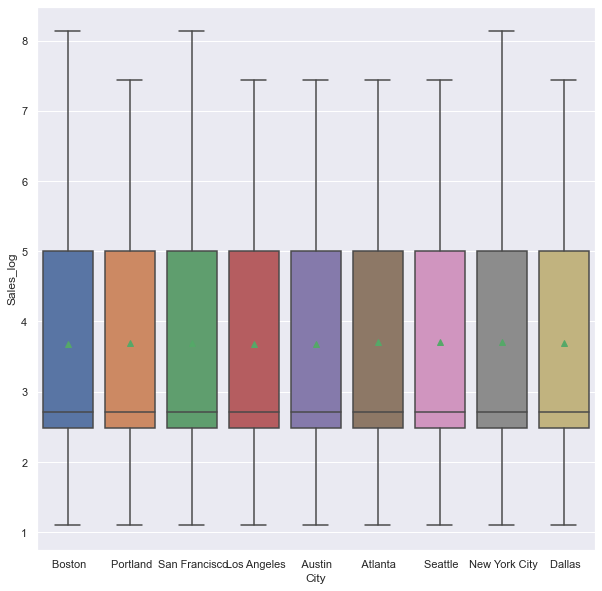

In [72]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(x = 'City', y = 'Sales_log', data = clean_retail,  showmeans = True)

# Most brought products city wise

<AxesSubplot:xlabel='City', ylabel='count'>

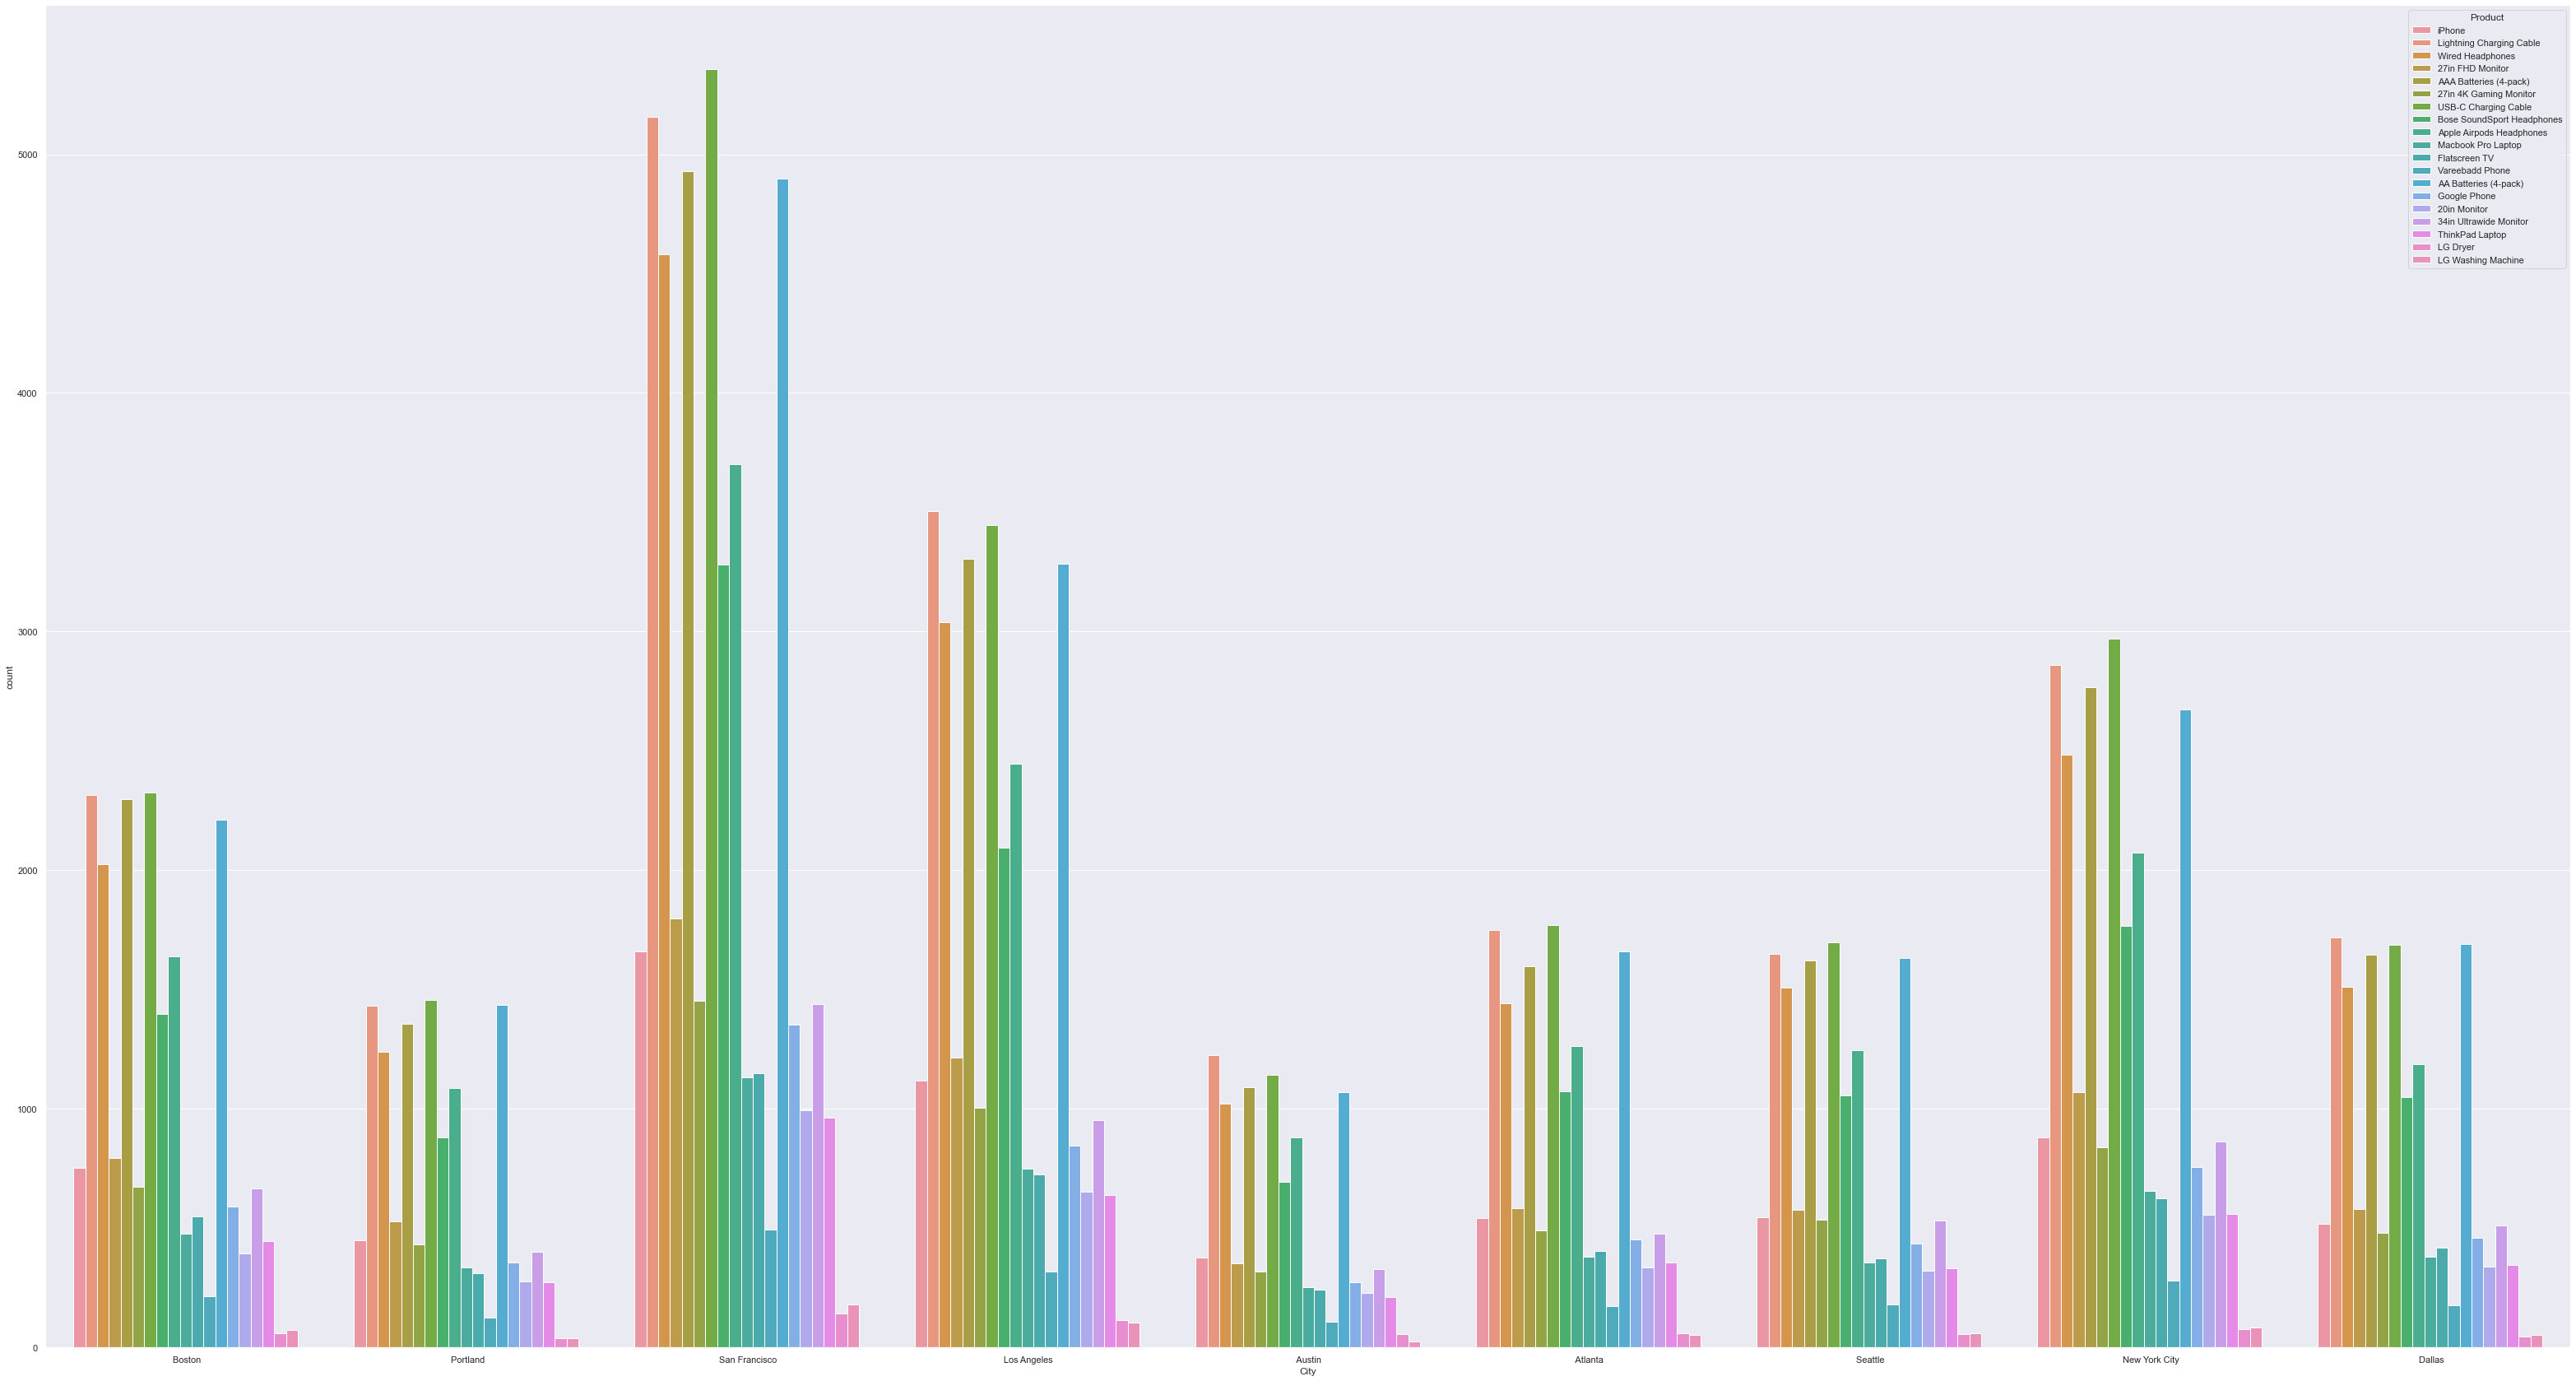

In [73]:

sns.set(rc={"figure.figsize":(55, 30)})
sns.countplot(x = 'City', hue = 'Product', data = clean_retail)

In [197]:
clean_retail.groupby('City')['Product'].count()

City
 Atlanta          14863
 Austin            9890
 Boston           19901
 Dallas           14797
 Los Angeles      29564
 New York City    24847
 Portland         12449
 San Francisco    44662
 Seattle          14713
Name: Product, dtype: int64

Atlanta showed the highest quantity sold.

In [215]:
df1 = clean_retail.groupby(['City','Product'])['Product','Quantity'].count()
pd.DataFrame(df1).sort_values(by = 'Quantity', ascending = False)

<ipython-input-215-5fd23431aab6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = clean_retail.groupby(['City','Product'])['Product','Quantity'].count()


Product  Quantity
City           Product                                    
 San Francisco USB-C Charging Cable         5357      5357
               Lightning Charging Cable     5157      5157
               AAA Batteries (4-pack)       4928      4928
               AA Batteries (4-pack)        4897      4897
               Wired Headphones             4582      4582
...                                          ...       ...
 Dallas        LG Washing Machine             51        51
               LG Dryer                       44        44
 Portland      LG Dryer                       37        37
               LG Washing Machine             37        37
 Austin        LG Washing Machine             26        26

[171 rows x 2 columns]

Most Bought products in each city:
 USB-c- charging cable is the most sold product as we can see from the graph.
 


In [74]:
clean_retail.head()

,Product,Quantity,Price,Order Date,Address,Year,Month,day,Hour,Sales,Sales_log,Sales_sqrt,City
0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,700.00,6.551080,26.457513,Boston
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14,14.95,2.704711,3.866523,Portland
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,23.98,3.177220,4.896938,San Francisco
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,149.99,5.010569,12.247040,Los Angeles
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11,11.99,2.484073,3.462658,Austin


In [90]:
p = clean_retail.groupby(['City','Product'])['Quantity'].sum()
pd.DataFrame(p).sort_values(by = 'Quantity', ascending = False)



Quantity
City           Product                           
 San Francisco AAA Batteries (4-pack)        7404
               AA Batteries (4-pack)         6549
               USB-C Charging Cable          5883
               Lightning Charging Cable      5540
 Los Angeles   AAA Batteries (4-pack)        4958
...                                           ...
 Dallas        LG Washing Machine              51
               LG Dryer                        44
 Portland      LG Dryer                        37
               LG Washing Machine              37
 Austin        LG Washing Machine              26

[171 rows x 1 columns]

In [ ]:
Most bought products per city.
Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.

Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night)

In [102]:
#df = clean_retail[(clean_retail['City'] == 'Boston')]
#df

In [83]:
clean_retail.head()

,Product,Quantity,Price,Order Date,Address,Year,Month,day,Hour,Sales,Sales_log,Sales_sqrt,City
0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,700.00,6.551080,26.457513,Boston
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14,14.95,2.704711,3.866523,Portland
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,23.98,3.177220,4.896938,San Francisco
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,149.99,5.010569,12.247040,Los Angeles
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11,11.99,2.484073,3.462658,Austin


__Which time of day has the most sales?
Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.__

In [103]:
df= pd.DataFrame({'number': np.random.randint(1, 100, 10)})
df['bins'] = pd.cut(x=df['number'], bins=[1, 20, 40, 60,
                                          80, 100])
print(df)

   number           bins
0      56   (40.0, 60.0]
1      19    (1.0, 20.0]
2      37   (20.0, 40.0]
3      87  (80.0, 100.0]
4      17    (1.0, 20.0]
5      14    (1.0, 20.0]
6      62   (60.0, 80.0]
7       1            NaN
8      15    (1.0, 20.0]
9       4    (1.0, 20.0]


In [104]:

clean_retail['Timing'] = pd.cut(x = clean_retail['Hour'], bins = [0,12,16,19,23],labels = ['Morning', 'Aftenoon', 'Evening', 'Night'])

In [105]:
clean_retail.head()

,Product,Quantity,Price,Order Date,Address,Year,Month,day,Hour,Sales,Sales_log,Sales_sqrt,City,Timing
0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,700.00,6.551080,26.457513,Boston,Night
1,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14,14.95,2.704711,3.866523,Portland,Aftenoon
2,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,23.98,3.177220,4.896938,San Francisco,Aftenoon
3,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,149.99,5.010569,12.247040,Los Angeles,Night
4,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11,11.99,2.484073,3.462658,Austin,Morning


<AxesSubplot:xlabel='Timing', ylabel='Sales_log'>

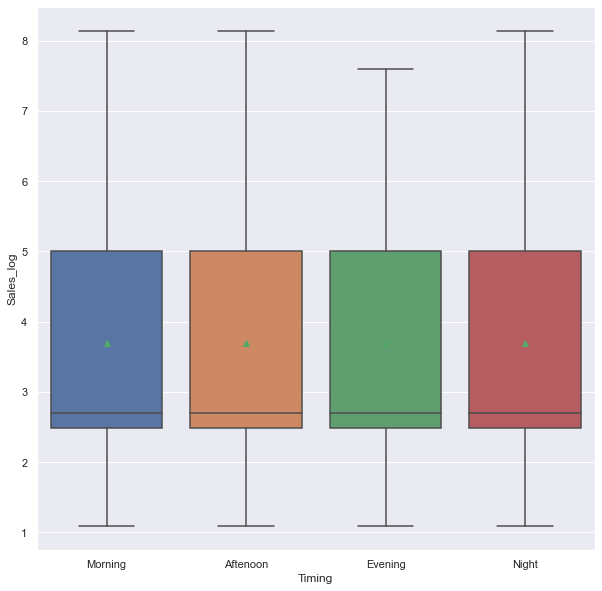

In [166]:
sns.set(rc={"figure.figsize":(10, 10)})

sns.boxplot(data = clean_retail, x = 'Timing', y = 'Sales_log', showmeans = True)

In [117]:
x = clean_retail.groupby('Timing')['Sales'].sum()
pd.DataFrame(x).sort_values(by = 'Sales', ascending = False)


,Sales
Timing,
Morning,1.181145e+07
Aftenoon,8.078030e+06
Night,7.105612e+06
Evening,6.756899e+06


In [248]:
product_sales = clean_retail.groupby(['Timing','Product'])['Sales'].sum()
pd.DataFrame(product_sales).sort_values(by = 'Sales', ascending = False)

,,Sales
Timing,Product,
Morning,Macbook Pro Laptop,2738700.00
Aftenoon,Macbook Pro Laptop,1871700.00
Morning,iPhone,1684200.00
Night,Macbook Pro Laptop,1659200.00
Evening,Macbook Pro Laptop,1615000.00
...,...,...
Night,AA Batteries (4-pack),22663.68
Aftenoon,AAA Batteries (4-pack),21288.80
Evening,AA Batteries (4-pack),19933.44


In [249]:
product_sales = clean_retail.groupby(['Timing','Product'])['Quantity'].sum()
pd.DataFrame(product_sales).sort_values(by = 'Quantity', ascending = False)

Quantity
Timing   Product                           
Morning  AAA Batteries (4-pack)       10732
         AA Batteries (4-pack)         9423
         USB-C Charging Cable          8347
         Lightning Charging Cable      8050
Aftenoon AAA Batteries (4-pack)        7120
...                                     ...
         LG Dryer                       164
Evening  LG Washing Machine             139
Night    LG Dryer                       136
         LG Washing Machine             128
Evening  LG Dryer                       119

[76 rows x 1 columns]

Sales as we can see are __maximum__ during the __morning__  and are __minimum__ during the __Evening__.

So the best suited time for opening the store should be Moring we should try to open the store early in the morning and
should increase the timing limit  to keep the store open at night.

We can probably choose evening time for the break and can close the store for some time in the evening like we can compensate that time of night with the evening.


__Before moving on to check the which products are mostly sold we need to look at the distribution of quantity.__

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


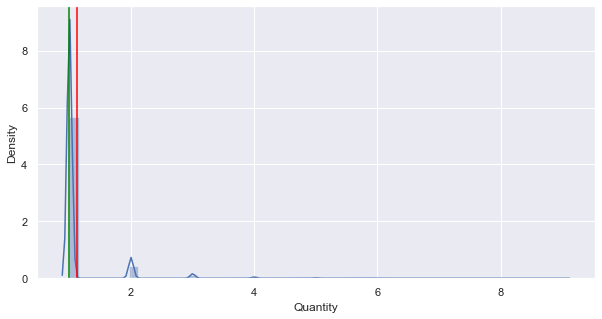

In [169]:
sns.set(rc={"figure.figsize":(10, 5)})

sns.distplot(clean_retail.Quantity)
plt.axvline(x = clean_retail.Quantity.mean(), color = 'red', alpha = 1,label = 'Mean')
plt.axvline(x = clean_retail.Quantity.median(), color = 'green', alpha = 1,label = 'Median')

In [170]:
clean_retail['Quantity'].skew()

4.82981115204352

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


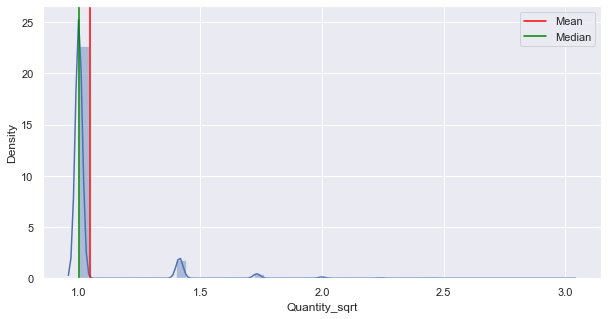

In [171]:
clean_retail['Quantity_sqrt'] = np.sqrt(clean_retail['Quantity'])
sns.distplot(clean_retail.Quantity_sqrt)
plt.axvline(x = clean_retail.Quantity_sqrt.mean(), color = 'red', alpha = 1,label = 'Mean')
plt.axvline(x = clean_retail.Quantity_sqrt.median(), color = 'green', alpha = 1,label = 'Median')
plt.legend()

In [172]:
clean_retail['Quantity_sqrt'].skew()

3.864870969270003

C:\Users\Bakul anmol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


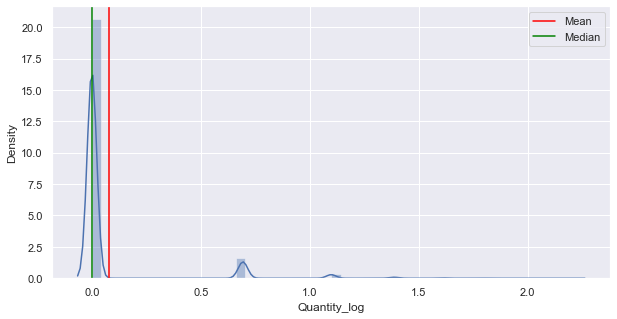

In [173]:
clean_retail['Quantity_log'] = np.log(clean_retail['Quantity'])
sns.distplot(clean_retail.Quantity_log)
plt.axvline(x = clean_retail.Quantity_log.mean(), color = 'red', alpha = 1,label = 'Mean')
plt.axvline(x = clean_retail.Quantity_log.median(), color = 'green', alpha = 1,label = 'Median')
plt.legend()

In [174]:
clean_retail['Quantity_log'].skew()

3.3558315980614446

In [175]:
#from scipy.stats import boxcox
#from sklearn.preprocessing import PowerTransformer

In [219]:
t = clean_retail.groupby(['Timing', 'Product'])['Quantity'].sum()
u = pd.DataFrame(t).sort_values(by = 'Quantity', ascending = False)
u


Quantity
Timing   Product                           
Morning  AAA Batteries (4-pack)       10732
         AA Batteries (4-pack)         9423
         USB-C Charging Cable          8347
         Lightning Charging Cable      8050
Aftenoon AAA Batteries (4-pack)        7120
...                                     ...
         LG Dryer                       164
Evening  LG Washing Machine             139
Night    LG Dryer                       136
         LG Washing Machine             128
Evening  LG Dryer                       119

[76 rows x 1 columns]

In [217]:
clean_retail.groupby('Timing')['Product'].count()

Timing
Morning     63960
Aftenoon    43598
Evening     36033
Night       38193
Name: Product, dtype: int64

__Sales are maximum during the Morning .__

<AxesSubplot:xlabel='Product', ylabel='Quantity'>

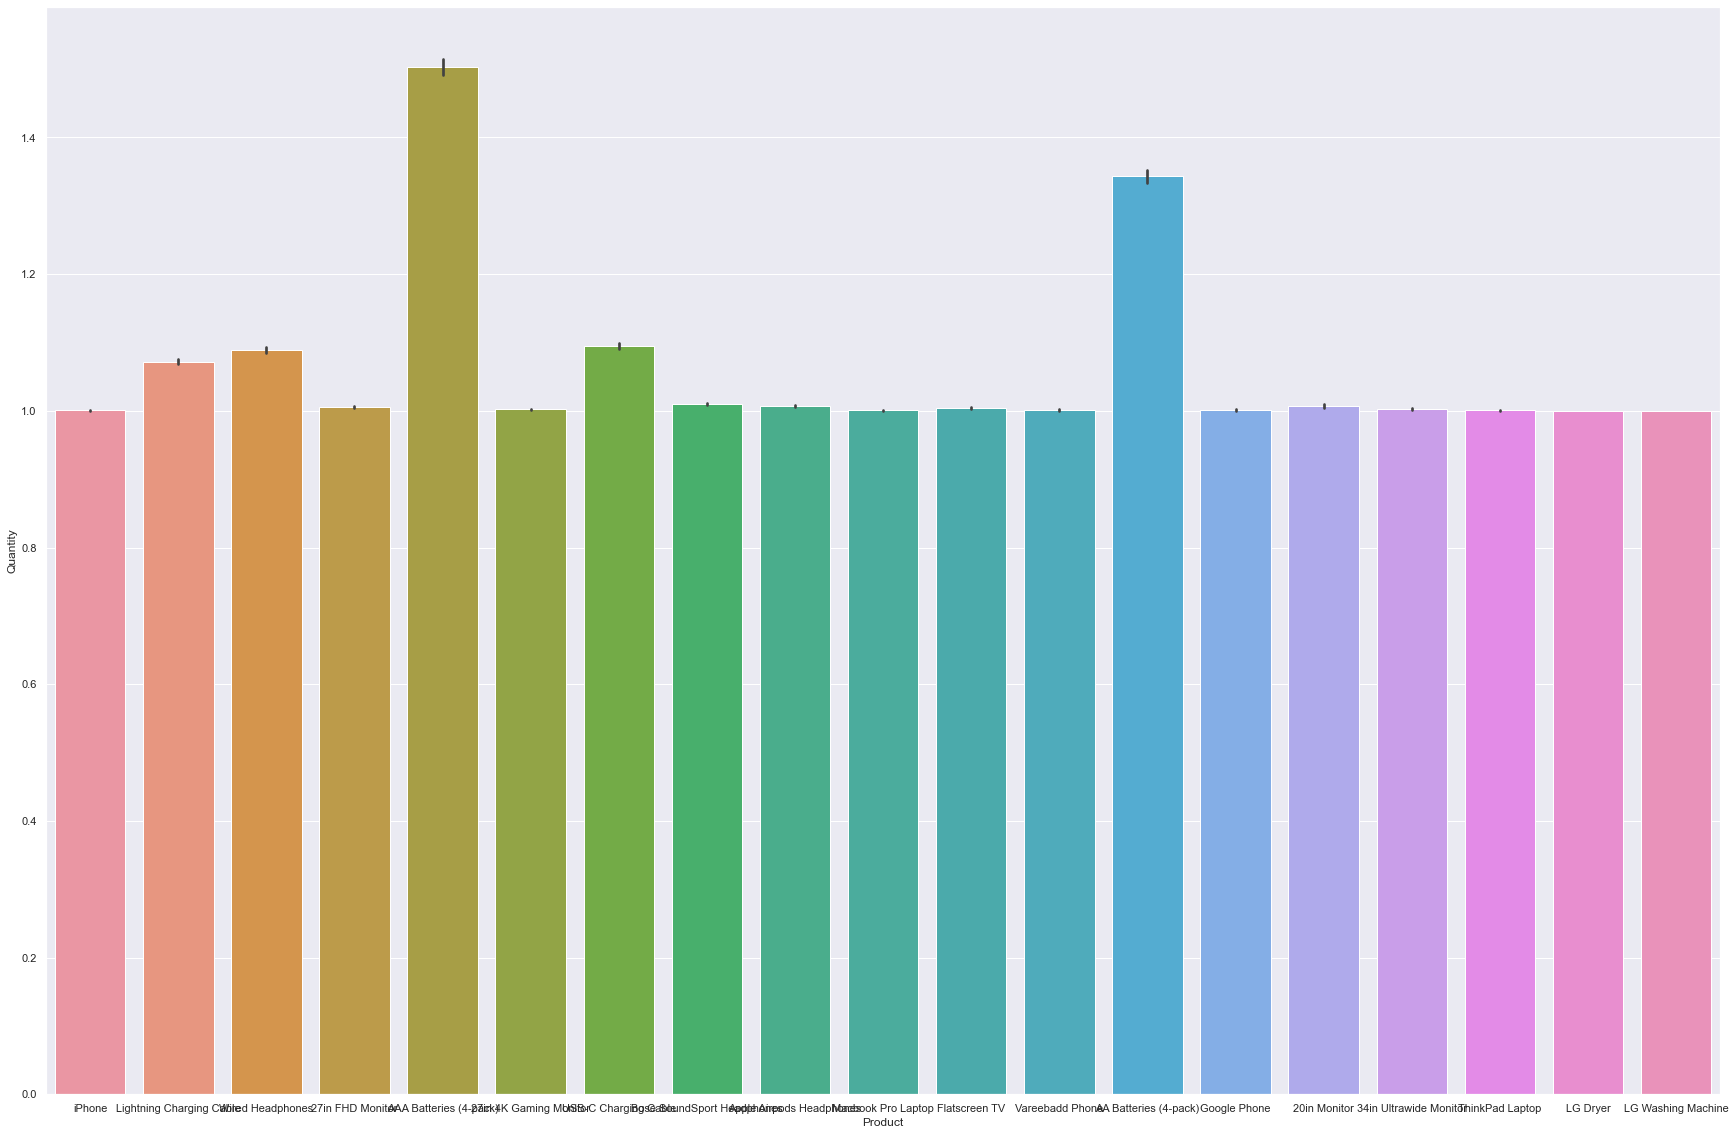

In [190]:
sns.set(rc={"figure.figsize":(30, 20)})

sns.barplot(x = 'Product', y = 'Quantity', data = clean_retail)

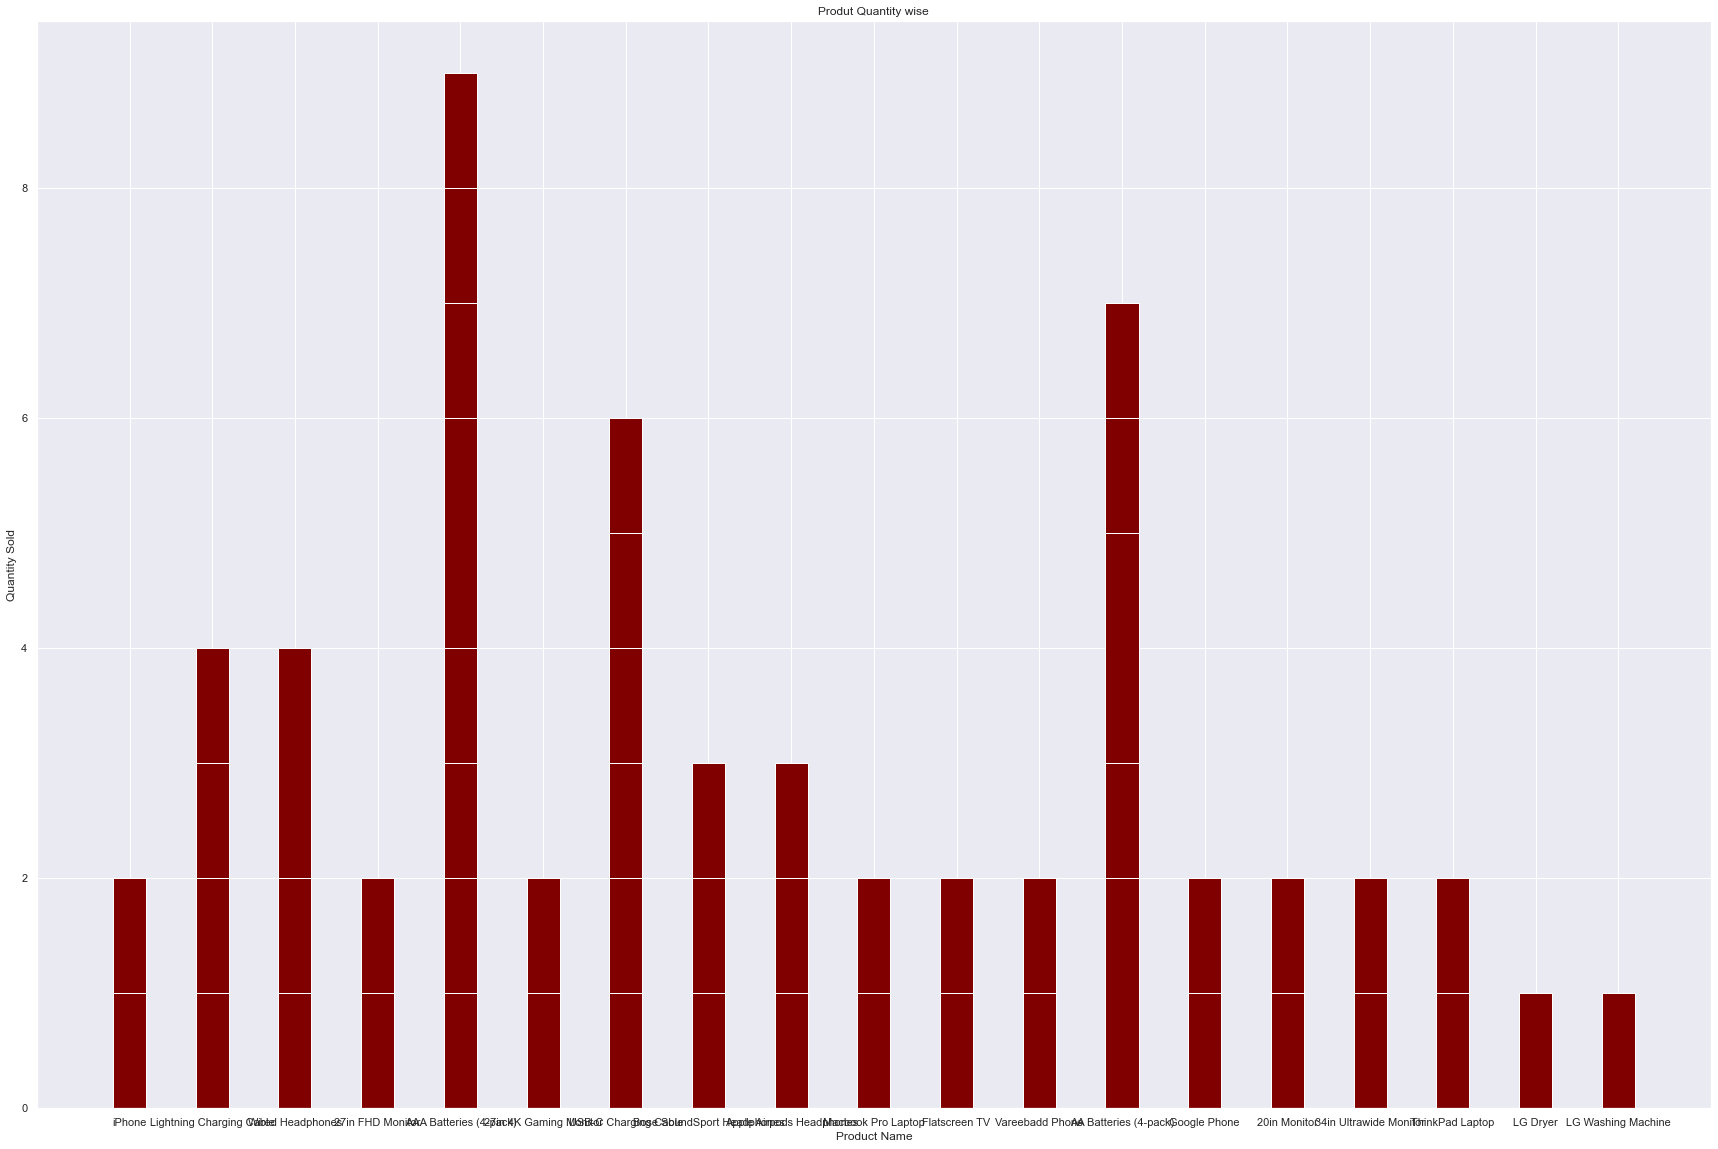

In [191]:
product = clean_retail['Product']
Quantity = clean_retail['Quantity']
plt.bar(product, Quantity, color ='maroon',
        width = 0.4)
 
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.title("Produt Quantity wise")
plt.show()

In [238]:
M =  clean_retail[(clean_retail['Timing'] == 'Morning')]
m = M.groupby('City')["Product",  "Quantity"].count()
pd.DataFrame(m).sort_values(by = 'Quantity', ascending = False)

<ipython-input-238-4ddadf7fe671>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m = M.groupby('City')["Product",  "Quantity"].count()


,Product,Quantity
City,,
San Francisco,15455,15455
Los Angeles,10162,10162
New York City,8545,8545
Boston,6768,6768
Atlanta,5133,5133
Seattle,5077,5077
Dallas,5052,5052
Portland,4263,4263
Austin,3505,3505


__During the Morning Most products are sold at Austin__.

In [239]:
A =  clean_retail[(clean_retail['Timing'] == 'Aftenoon')]
a = A.groupby('City')["Product",  "Quantity"].count()
pd.DataFrame(a).sort_values(by = 'Quantity', ascending = False)

<ipython-input-239-fc64240c019f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = A.groupby('City')["Product",  "Quantity"].count()


,Product,Quantity
City,,
San Francisco,10457,10457
Los Angeles,6863,6863
New York City,5861,5861
Boston,4698,4698
Dallas,3544,3544
Atlanta,3461,3461
Seattle,3432,3432
Portland,2946,2946
Austin,2336,2336


In [240]:
N =  clean_retail[(clean_retail['Timing'] == 'Night')]
n = N.groupby('City')["Product",  "Quantity"].count()
pd.DataFrame(n).sort_values(by = 'Quantity', ascending = False)

<ipython-input-240-38a494b82282>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  n = N.groupby('City')["Product",  "Quantity"].count()


,Product,Quantity
City,,
San Francisco,9096,9096
Los Angeles,6173,6173
New York City,5083,5083
Boston,4093,4093
Seattle,3099,3099
Atlanta,3083,3083
Dallas,3024,3024
Portland,2556,2556
Austin,1986,1986


In [242]:
E =  clean_retail[(clean_retail['Timing'] == 'Evening')]
e = E.groupby('City')["Product",  "Quantity"].count()
pd.DataFrame(e).sort_values(by = 'Quantity', ascending = False)

<ipython-input-242-e822ab130f2a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  e = E.groupby('City')["Product",  "Quantity"].count()


,Product,Quantity
City,,
San Francisco,8717,8717
Los Angeles,5732,5732
New York City,4801,4801
Boston,3916,3916
Dallas,2894,2894
Atlanta,2876,2876
Seattle,2819,2819
Portland,2413,2413
Austin,1865,1865


__From the above analysis we can say that San Francisco is having the most products sold.
So we can suggest San Francisco for establishing a new branch for the retail store.__

__Since we can clearly see that this city is ahead in terms of both sales and Quantity sold so it would be beneficial 
to establish a new branch here.__